
# Introduction

This notebook explores two *redacted* Riveter objects from the paper *A Powerful Hades is an Unpopular Dude: Dynamics of Power and Agency in Hades/Persephone Fanfiction* for the Conference of Computational Literary Studies 2025. The two Riveter objects operationalize the dimensions of power and agency in a corpus of Hades/Persephone fanfiction respectively. They have been redacted by removing the full texts of the fanfiction, so that the Riveter-scores for these texts can be analyzed and reused without violation of ethical norms or copyright. 

Note that while Riveter contains functions to explore the scores or detected entities per document, these functions will not work here because the documents and associated information have been redacted.

# Import Libraries

In [2]:
# importing the requirements

from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter
import pickle

import seaborn as sns
import matplotlib.pyplot as plt


# SPACY & COREF IMPORTS
import spacy
import spacy_experimental
nlp = spacy.load("en_core_web_sm")
nlp_coref = spacy.load("en_coreference_web_trf")

nlp_coref.replace_listeners("transformer", "coref", ["model.tok2vec"])
nlp_coref.replace_listeners("transformer", "span_resolver", ["model.tok2vec"])

nlp.add_pipe("coref", source=nlp_coref)
nlp.add_pipe("span_resolver", source=nlp_coref)

# Loading the model

In [ ]:
# riveter = Riveter(filename = "hadper_power.pkl")
with open("hadper_power_CCLS_redacted.pkl", 'rb') as f:
    riveter = pickle.load(f)
    
# note that you can change 'power' to 'agency' here to switch between dimensions

In [ ]:
# You can count the number of times a given entity has been assigned a coreference cluster

clustercounts = riveter.get_persona_cluster('persephone')
print(sum(clustercounts.values()))

7539


In [29]:
persona_score_dict = riveter.get_score_totals()
for _persona, _score in sorted(persona_score_dict.items(), key=lambda x: x[1], reverse=True):
    print(round(_score, 3), '\t', _persona)

1.0 	 ah-
1.0 	 briskness
1.0 	 no sound
1.0 	 melting
1.0 	 countryside
1.0 	 white-hot lust
1.0 	 attendant nymphs
1.0 	 struggles
1.0 	 poppy's charm
1.0 	 each thread
1.0 	 only what
1.0 	 tis
1.0 	 old doubts
1.0 	 bright being
1.0 	 silver-blue surface
1.0 	 both party announcements
1.0 	 trousers
1.0 	 slow, sallow laugh
1.0 	 those six words
1.0 	 immaculate, well-groomed hair
1.0 	 what number
1.0 	 other customs
1.0 	 most plants
1.0 	 co
1.0 	 uncle poseidon
1.0 	 stronger the feeling
1.0 	 elbows
1.0 	 more goblets
1.0 	 that talent
1.0 	 tingle
1.0 	 this effusion
1.0 	 night time
1.0 	 dark underworld settling
1.0 	 these feelings
1.0 	 pleading
1.0 	 katerina
1.0 	 crystal-like pearls
1.0 	 single spritz
1.0 	 but--
1.0 	 some stores
1.0 	 crevasse
1.0 	 new shade
1.0 	 one route
1.0 	 how sorrow
1.0 	 bartenders
1.0 	 willow trees
1.0 	 treetops
1.0 	 grease
1.0 	 such kingly men
1.0 	 beautiful voice
1.0 	 all the nymphs
1.0 	 even argus
1.0 	 new torment
1.0 	 no othe

# Cumulative Scores
You can use the .get_score_totals() function to get cumulative power scores (or chosen dynamic scores) for each persona mentioned in the texts.

In [ ]:
# a frequency threshold of 10 cleans up these results nicely

riveter.get_score_totals(10)

{'you': -0.006161971830985915,
 'god': -0.0180623973727422,
 "libera's hand": -0.1111111111111111,
 'i': -0.03525560312263913,
 'they': 0.002105263157894737,
 'time': -0.0045045045045045045,
 'people': -0.023255813953488372,
 'underworld': -0.04364326375711575,
 'this': -0.020833333333333332,
 'night': -0.022222222222222223,
 'persephone': -0.037936065791219,
 'mortals': -0.08176100628930817,
 'spring': -0.008771929824561403,
 'earth': -0.04263565891472868,
 'goddess': -0.09448818897637795,
 'husband': -0.02075368651010377,
 'stars': 0.06666666666666667,
 'some': -0.11392405063291139,
 'others': 0.015873015873015872,
 'it': 0.006628369421122404,
 'she': -0.056665979806305375,
 'hades': -0.030867482703565728,
 'world': -0.043668122270742356,
 'me and': -0.06521739130434782,
 'me': -0.03492063492063492,
 'days': 0.0851063829787234,
 'all': -0.046218487394957986,
 'ariadne': -0.008695652173913044,
 'death': 0.022321428571428572,
 'daughter': -0.07368421052631578,
 'anything': -0.222929936

### Scores per persona

In [11]:
#We can see all the contributing verbs for each persona and whether they contributed positively or negatively.
riveter.get_persona_polarity_verb_count_dict()

{'you': defaultdict(<function riveter.default_dict_int()>,
             {'negative': defaultdict(int,
                          {'hear_nsubj': 7,
                           'reach_nsubj': 1,
                           'join_nsubj': 1,
                           'adjust_dobj': 1,
                           'know_dobj': 10,
                           'bring_dobj': 6,
                           'catch_dobj': 1,
                           'watch_dobj': 2,
                           'want_nsubj': 10,
                           'ask_nsubj': 5,
                           'hold_dobj': 4,
                           'protect_dobj': 1,
                           'kill_dobj': 1,
                           'punish_dobj': 1,
                           'choke_dobj': 1,
                           'send_dobj': 5,
                           'like_nsubj': 5,
                           'examine_dobj': 1,
                           'pull_dobj': 4,
                           'guide_dobj': 1,
               

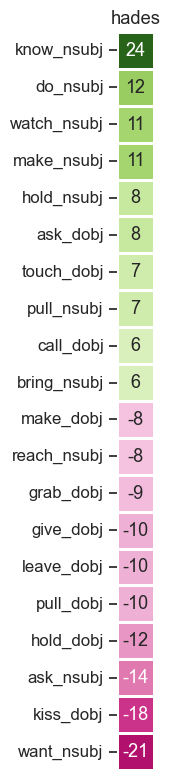

In [13]:
# And we can view these scores for each persona.
#In the following heatmap, each cell contains the count of matching verbs for the persona that contributed either positively or negatively to its final score. 

riveter.plot_verbs_for_persona('hades', figsize=(2, 8))

### Plotting scores

/Users/julia.neugarten/opt/anaconda3/envs/riveterEnv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julia.neugarten/opt/anaconda3/envs/riveterEnv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julia.neugarten/opt/anaconda3/envs/riveterEnv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


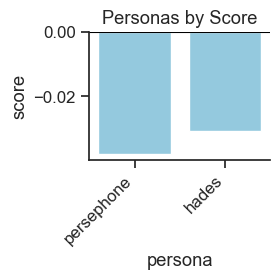

In [18]:
#You can use the .plot_scores() function to display a bar plot with the top n or bottom n personas in the texts.
#The function will display the top 10 highest-scoring personas by default.



riveter.plot_scores(title='Personas by Score', target_personas=['hades', 'persephone'], figsize=(3, 3))